In [90]:
import pandas as pd
import os 
import gc
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
os.getcwd()

'C:\\Users\\saira\\Downloads\\Citibike-Dashboard'

In [236]:
# del df 
# gc.collect() 

2175

In [237]:
df = pd.read_csv('year_2024')

In [241]:
df['started_at'] = pd.to_datetime(df['started_at'])

In [244]:
month_rides = df.groupby(df['started_at'].dt.month)['tripduration'].count()

In [246]:
month_rides.pct_change()*100

started_at
1     NaN
2    9.77
3   17.92
4   20.64
5   23.21
Name: tripduration, dtype: float64

In [192]:
df[df['tripduration']/60>=45]['tripduration'].count()

7235

In [171]:
user['Percentage Growth'] = user['Total Users'].pct_change() *100
user['User Growth'] = user['Total Users'].diff()

user['Subscriber Growth'] = user['Subscriber'].diff()
user['Subscriber Percentage Growth'] = user['Subscriber'].pct_change() *100

user['Male Percentage'] = user['Male_riders']/ (user['Male_riders'] + user['Female_riders']) * 100
user['Female Percentage'] = user['Female_riders']/ (user['Male_riders'] + user['Female_riders']) * 100

In [174]:
user.to_csv('YoY_change.csv',index = False)

In [178]:
user

,Year,Customer,Subscriber,Total Users,Male_riders,Female_riders,Percentage Growth,User Growth,Subscriber Growth,Subscriber Percentage Growth,Male Percentage,Female Percentage
0,2014,793495,7287721,8081216,5635962,1650274,NaN,NaN,NaN,NaN,77.35,22.65
1,2015,1311331,8626638,9937969,6608929,2006962,22.98,1856753.00,1338917.00,18.37,76.71,23.29
2,2016,1236265,9026384,10262649,6769032,2186917,3.27,324680.00,399746.00,4.63,75.58,24.42
3,2017,1676712,12441957,14118669,9306602,3236735,37.57,3856020.00,3415573.00,37.84,74.20,25.80
4,2018,1933514,15614825,17548339,11971322,4092462,24.29,3429670.00,3172868.00,25.50,74.52,25.48
5,2019,2872176,17679521,20551697,14052393,4938996,17.11,3003358.00,2064696.00,13.22,73.99,26.01
6,2020,4551091,14955766,19506857,11798407,5551873,-5.08,-1044840.00,-2723755.00,-15.41,68.00,32.00
7,2021,150177,945169,1095346,714609,289850,-94.38,-18411511.00,-14010597.00,-93.68,71.14,28.86
8,2022,6694850,23995071,30689921,0,0,2701.85,29594575.00,23049902.00,2438.71,NaN,NaN
9,2023,6696867,29529733,36226600,0,0,18.04,5536679.00,5534662.00,23.07,NaN,NaN


In [82]:
ride =  pd.read_csv('my_ride_data.csv')

user =  pd.read_csv('my_data.csv')

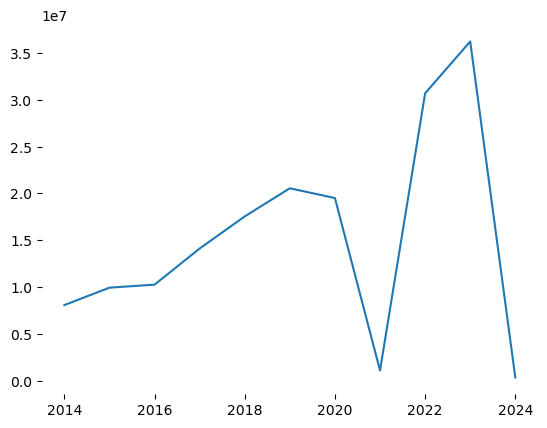

In [164]:
plt.plot(user['Year'],user['Total Users'])
sns.despine(bottom = True, left = True)
plt.show()

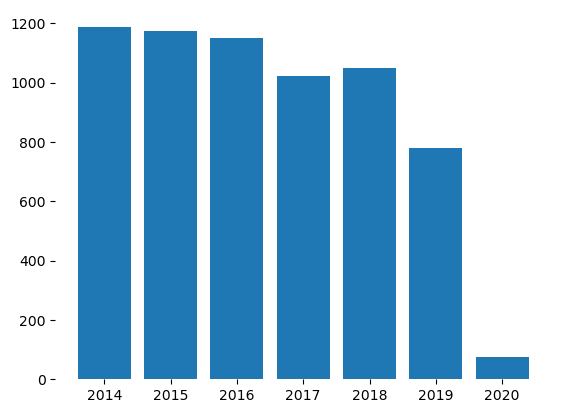

In [168]:
plt.bar(x = ride['Year'][0:7], height = ride['Average number of rides per bike'][0:7])
sns.despine(bottom = True, left = True)
plt.show()

In [61]:
df = pd.read_csv('year_2014.csv')

In [52]:
def get_excel_files_from_monthly_folders(base_path, chunksize=100000):
    column_mapping = {'Trip Duration': 'tripduration',
                      'Start Time': 'starttime',
                      'Stop Time': 'stoptime',
                      'Start Station ID': 'start station id',
                      'Start Station Name': 'start station name',
                      'Start Station Latitude': 'start station latitude',
                      'Start Station Longitude': 'start station longitude',
                      'End Station ID': 'end station id',
                      'End Station Name': 'end station name',
                      'End Station Latitude': 'end station latitude',
                      'End Station Longitude': 'end station longitude',
                      'Bike ID': 'bikeid',
                      'User Type': 'usertype',
                      'Birth Year': 'birth year',
                      'Gender': 'gender'}

    if not os.path.exists(base_path):
        print(f"Error: The base path '{base_path}' does not exist.")
        return []

    all_chunks = []

    for month_folder in os.listdir(base_path):
        month_path = os.path.join(base_path, month_folder)

        if os.path.isdir(month_path):
            for file in os.listdir(month_path):
                if file.endswith(".csv"):
                    file_path = os.path.join(month_path, file)
                    try:
                        chunks = pd.read_csv(file_path, chunksize=chunksize)
                        for chunk in chunks:
                            all_chunks.append(chunk)
                    except Exception as e:
                        print(f"Error reading {file_path}: {e}")

    return all_chunks

# Drop stoptime, id, name, birth year, etc.
# Add Birth year do
def combine_dataframes_pre2022(dataframes_chunks):
    combined_chunks = []
    for chunk in dataframes_chunks:
        combined_chunk = chunk[['tripduration', 'starttime', 'gender', 'birth year', 'usertype', 'bikeid']]
        combined_chunks.append(combined_chunk)
    return combined_chunks

def save_combined_dataframe(df_chunks, output_path):
    try:
        with pd.ExcelWriter(output_path, engine='openpyxl') as writer:
            for i, df_chunk in enumerate(df_chunks):
                df_chunk.to_excel(writer, index=False, header=False, startrow=i * len(df_chunk), sheet_name='Sheet1')
        print(f"Combined Excel file saved to: {output_path}")
    except Exception as e:
        print(f"Error saving combined Excel file: {e}")

In [26]:
ride_data = {
    'Year': [],
    'Average_Ride_Duration': [],
    'Subscriber_Average': [],
    'Customer_Average':[],
    'Number_of_rides_over_45_minutes':[],
    'Percentage_over_45_minutes':[],
    'Longest_ride':[]
}

In [54]:
# del df
gc.collect()

2155

In [62]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1027,10/1/2014 00:00:27,10/1/2014 00:17:34,479,9 Ave & W 45 St,40.76,-73.99,540,Lexington Ave & E 26 St,40.74,-73.98,21376,Subscriber,1977.00,1
1,534,10/1/2014 00:00:36,10/1/2014 00:09:30,417,Barclay St & Church St,40.71,-74.01,417,Barclay St & Church St,40.71,-74.01,16086,Subscriber,1974.00,2
2,416,10/1/2014 00:00:42,10/1/2014 00:07:38,327,Vesey Pl & River Terrace,40.72,-74.02,415,Pearl St & Hanover Square,40.70,-74.01,16073,Subscriber,1990.00,1
3,428,10/1/2014 00:00:50,10/1/2014 00:07:58,515,W 43 St & 10 Ave,40.76,-73.99,447,8 Ave & W 52 St,40.76,-73.99,18635,Subscriber,1966.00,1
4,281,10/1/2014 00:01:08,10/1/2014 00:05:49,497,E 17 St & Broadway,40.74,-73.99,537,Lexington Ave & E 24 St,40.74,-73.98,20203,Subscriber,1979.00,1


In [63]:
pd.options.display.float_format = '{:.2f}'.format

In [64]:
df['tripduration'].agg(['mean','max'])/60

mean      14.19
max    90277.33
Name: tripduration, dtype: float64

In [65]:
df[df['tripduration']/60>=45]['tripduration'].count()

144944

In [66]:
df[df['tripduration']/60>=45]['tripduration'].count()/df['tripduration'].count()*100

1.7935914595031244

In [69]:
df.groupby('usertype')['tripduration'].agg('mean')/60

usertype
Customer     26.97
Subscriber   12.79
Name: tripduration, dtype: float64

In [27]:
ride_data['Year'].append(2024),
ride_data['Average_Ride_Duration'].append(9.74),
ride_data['Subscriber_Average'].append(7.63),
ride_data['Customer_Average'].append(17.46),
ride_data['Number_of_rides_over_45_minutes'].append(7235),
ride_data['Percentage_over_45_minutes'].append(2.08)
ride_data['Longest_ride'].append(1418.68)

In [30]:
ride_data

{'Year': [2024],
 'Average_Ride_Duration': [9.74],
 'Subscriber_Average': [7.63],
 'Customer_Average': [17.46],
 'Number_of_rides_over_45_minutes': [7235],
 'Percentage_over_45_minutes': [2.08],
 'Longest_ride': [1418.68]}

In [28]:
data = {'Year': [2020, 2018, 2019, 2023],
        'Average_Ride_Duration': [21.85, 16.48, 16.3, 13.75],
        'Subscriber_Average': [16.74, 13.2, 13.26, 11.97],
        'Customer_Average': [38.63, 42.98, 35.06, 21.62],
        'Number_of_rides_over_45_minutes': [930562, 332669, 332669, 1058291],
        'Percentage_over_45_minutes': [4.77, 1.9, 1.97, 2.92],
        'Longest_ride': [63103.12, 325167.48, 63544.43, 1439.98]}

ride_data_df = pd.DataFrame(data)

In [76]:
new_data = {'Year': [2024],
 'Average_Ride_Duration': [9.74],
 'Subscriber_Average': [7.63],
 'Customer_Average': [17.46],
 'Number_of_rides_over_45_minutes': [7235],
 'Percentage_over_45_minutes': [2.08],
 'Longest_ride': [1418.68]}
# Append new data to the DataFrame
ride_data_df.loc[len(ride_data_df)] = new_data

In [249]:
ride_data_df

,Year,Average_Ride_Duration,Subscriber_Average,Customer_Average,Number_of_rides_over_45_minutes,Percentage_over_45_minutes,Longest_ride
0,2020,21.85,16.74,38.63,930562,4.77,63103.12
1,2018,16.48,13.20,42.98,332669,1.90,325167.48
2,2019,16.30,13.26,35.06,332669,1.97,63544.43
3,2023,13.75,11.97,21.62,1058291,2.92,1439.98
4,2024,9.74,7.63,17.46,7235,2.08,1418.68
5,2014,14.19,12.79,26.97,144944,1.80,90277.33


In [250]:
ride_data_df['Longest_ride']/60

0   1051.72
1   5419.46
2   1059.07
3     24.00
4     23.64
5   1504.62
Name: Longest_ride, dtype: object

In [228]:
user['Percentage of Rides by Customer'] = user['Customer']/user['Total Users']*100

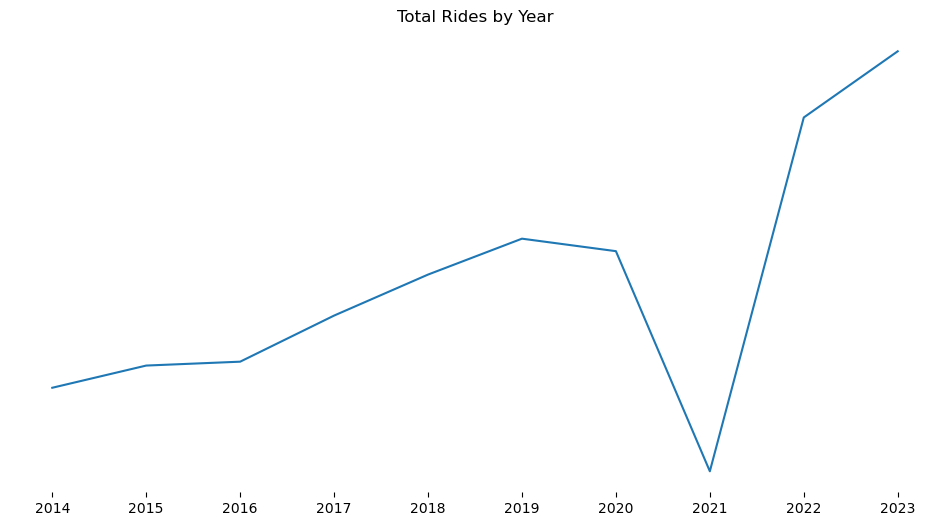

In [223]:
import numpy as np
years = user['Year'][0:10].unique()
plt.figure(figsize=(12, 6))
plt.plot(user['Year'][0:10], user['Total Users'][0:10])
plt.xticks(np.arange(min(years), max(years)+1, 1.0), years) 
plt.yticks([]) 
plt.title('Total Rides by Year')
sns.despine(bottom = True, left = True)
plt.show()

In [229]:
user

,Year,Customer,Subscriber,Total Users,Male_riders,Female_riders,Percentage Growth,User Growth,Subscriber Growth,Subscriber Percentage Growth,Male Percentage,Female Percentage,Percentage of Rides by Customer
0,2014,793495,7287721,8081216,5635962,1650274,NaN,NaN,NaN,NaN,77.35,22.65,9.82
1,2015,1311331,8626638,9937969,6608929,2006962,22.98,1856753.00,1338917.00,18.37,76.71,23.29,13.20
2,2016,1236265,9026384,10262649,6769032,2186917,3.27,324680.00,399746.00,4.63,75.58,24.42,12.05
3,2017,1676712,12441957,14118669,9306602,3236735,37.57,3856020.00,3415573.00,37.84,74.20,25.80,11.88
4,2018,1933514,15614825,17548339,11971322,4092462,24.29,3429670.00,3172868.00,25.50,74.52,25.48,11.02
5,2019,2872176,17679521,20551697,14052393,4938996,17.11,3003358.00,2064696.00,13.22,73.99,26.01,13.98
6,2020,4551091,14955766,19506857,11798407,5551873,-5.08,-1044840.00,-2723755.00,-15.41,68.00,32.00,23.33
7,2021,150177,945169,1095346,714609,289850,-94.38,-18411511.00,-14010597.00,-93.68,71.14,28.86,13.71
8,2022,6694850,23995071,30689921,0,0,2701.85,29594575.00,23049902.00,2438.71,NaN,NaN,21.81
9,2023,6696867,29529733,36226600,0,0,18.04,5536679.00,5534662.00,23.07,NaN,NaN,18.49


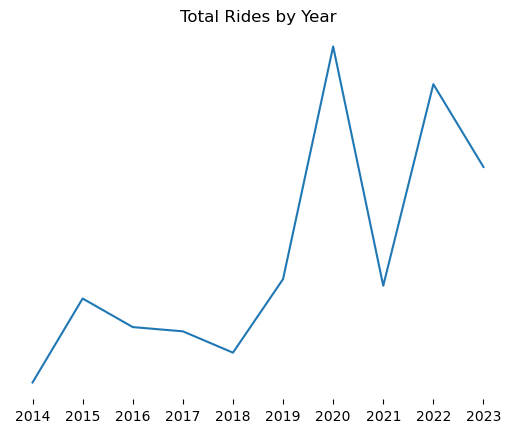

In [230]:
import numpy as np
years = user['Year'][0:10].unique()
plt.plot(user['Year'][0:10], user['Percentage of Rides by Customer'][0:10])
plt.xticks(np.arange(min(years), max(years)+1, 1.0), years) 
plt.yticks([]) 
plt.title('Total Rides by Year')
sns.despine(bottom = True, left = True)
plt.show()